In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib as mpl
import seaborn as sns
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit,GridSearchCV,cross_val_score, KFold
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

In [10]:
df = pd.read_csv('DataML2.csv')
df.index = df['period']
df.index.name=None
df = df.drop(columns=['period'])
df.index.name='period'
df

gdprl    csplrl     csprl     cslrl      csgrl      invrl  \
period                                                                 
Jan-12  6.110087  5.780286  5.547299  6.200196   7.742390   6.986212   
Feb-12  6.110087  5.780286  5.547299  6.200196   7.742390   6.986212   
Mar-12  6.110087  5.780286  5.547299  6.200196   7.742390   6.986212   
Apr-12  6.207811  6.967163  5.511730  6.871508  16.776838  10.131111   
May-12  6.207811  6.967163  5.511730  6.871508  16.776838  10.131111   
...          ...       ...       ...       ...        ...        ...   
Sep-20 -3.485374 -4.001398 -4.046090 -1.967292   9.759699  -6.479756   
Oct-20 -2.194768 -3.582511 -3.614345 -2.138715   1.757572  -6.151957   
Nov-20 -2.194768 -3.582511 -3.614345 -2.138715   1.757572  -6.151957   
Dec-20 -2.194768 -3.582511 -3.614345 -2.138715   1.757572  -6.151957   
Jan-21       NaN       NaN       NaN       NaN        NaN        NaN   

            xgsrl      mgsrl     inhrl      inbrl  ...  goog_groc  goog_parks  \
period                                             ...                          
Jan-12   6.842575  11.053824  5.456052  11.224086  ...        NaN         NaN   
Feb-12   6.842575  11.053824  5.456052  11.224086  ...        NaN         NaN   
Mar-12   6.842575  11.053824  5.456052  11.224086  ...        NaN         NaN   
Apr-12   1.713118  15.426255  6.618118  19.656792  ...        NaN         NaN   
May-12   1.713118  15.426255  6.618118  19.656792  ...        NaN         NaN   
...           ...        ...       ...        ...  ...        ...         ...   
Sep-20 -11.657055 -23.003171 -5.600000  -8.989116  ...  -2.333333  -10.366667   
Oct-20  -7.211662 -13.517052 -6.633814  -4.708003  ...   0.064516   -7.645161   
Nov-20  -7.211662 -13.517052 -6.633814  -4.708003  ...  -0.466667  -12.666667   
Dec-20  -7.211662 -13.517052 -6.633814  -4.708003  ...   4.225806   -6.548387   
Jan-21        NaN        NaN       NaN        NaN  ...  -7.363636  -17.454545   

        goog_transit  goog_work   goog_res   goog_avg       IPBK      IPAMM  \
period                                                                        
Jan-12           NaN        NaN        NaN        NaN        NaN        NaN   
Feb-12           NaN        NaN        NaN        NaN        NaN        NaN   
Mar-12           NaN        NaN        NaN        NaN        NaN        NaN   
Apr-12           NaN        NaN        NaN        NaN        NaN        NaN   
May-12           NaN        NaN        NaN        NaN        NaN        NaN   
...              ...        ...        ...        ...        ...        ...   
Sep-20    -36.000000 -18.866667  11.766667 -12.188889  37.466078  27.929502   
Oct-20    -32.193548 -23.000000   9.774194 -11.833333  40.786587  34.514693   
Nov-20    -29.300000 -20.966667   7.300000 -12.066667  43.031193  35.586534   
Dec-20    -25.580645 -24.677419   9.935484  -9.478495  45.322294  38.623498   
Jan-21    -36.318182 -28.090909  11.181818 -16.909091  43.968255  27.076119   

              ITP        IIK  
period                        
Jan-12        NaN        NaN  
Feb-12        NaN        NaN  
Mar-12        NaN        NaN  
Apr-12        NaN        NaN  
May-12        NaN        NaN  
...           ...        ...  
Sep-20  32.982781  29.337052  
Oct-20  34.757150  31.410465  
Nov-20  38.456308  28.422419  
Dec-20  41.747653  32.130951  
Jan-21  33.160739  32.189482  

[109 rows x 78 columns]

In [17]:
#droping variable
data = df.drop(columns=['csplrl','csprl','cslrl','csgrl','invrl','xgsrl','mgsrl','inhrl','inbrl','retailsales','sukucadang','manminrok','bbm','gadget','perlengkapanrt','baranglain','onlinesales','onlinetranspr','motorsales','konsumsiskn','tariktunai','belanjadebet','tariktunaicc','ntp','wageburuh','wageart','wagebarber','wagetukang','ihsg','yield1y','IHPRsekunder','DPKindividu','KreditKonsumsi','JobVacancy','IEK','jalantolgol1','inflasipendidikan','inflasikesehatan','devisa_transpor','devisa_travel','semensales','imporkonstruksi','orderbook','voltraffgol3','voltraffgol5','presalesprop','pmi','salesalatberat','kredit_mk','kredit_inv','voltraffgol4','rtgs','ekspor_nm_rl','impor_nm_rl','ekspor_nm_pi','impor_nm_pi','ekspor_mg_nl','impor_mg_nl','sup_valas_jl','sup_valas_bl','goog_retail','goog_groc','goog_parks','goog_transit','goog_work','goog_res','goog_avg','IPBK','IPAMM','ITP','IIK'])
data

gdprl  barangbudaya  barangsandang  mobilsales         IKK  \
period                                                                  
Jan-12  6.110087     97.748775     122.355941       76427  119.200000   
Feb-12  6.110087    101.825121     110.749180       86486  111.700000   
Mar-12  6.110087    105.193351     114.664600       87917  107.300000   
Apr-12  6.207811    102.909736     112.962527       87144  102.500000   
May-12  6.207811    103.730032     123.943550       95541  109.000000   
...          ...           ...            ...         ...         ...   
Sep-20 -3.485374     64.429920      64.796720       48554   83.357487   
Oct-20 -2.194768     65.040389      66.348474       49018   79.018127   
Nov-20 -2.194768     64.974399      70.598412       53834   92.026110   
Dec-20 -2.194768     64.769041      76.114856       57129   96.496235   
Jan-21       NaN     60.725491      76.817135       52910   84.854273   

               IKE  prod_motor  
period                          
Jan-12  110.900000       76188  
Feb-12  103.500000       85747  
Mar-12  102.400000       85097  
Apr-12   97.600000       83721  
May-12  103.800000       90869  
...            ...         ...  
Sep-20   54.135689       59573  
Oct-20   51.463568       66378  
Nov-20   60.142087       72386  
Dec-20   68.643029       68173  
Jan-21   63.041617       75728  

[109 rows x 7 columns]

In [18]:
data = data[data.columns].pct_change(periods=12)
data = data.dropna()
data

gdprl  barangbudaya  barangsandang  mobilsales       IKK       IKE  \
period                                                                          
Jan-13 -0.093160     -0.031166       0.034690    0.265155 -0.025030 -0.023058   
Feb-13 -0.093160     -0.061437       0.135979    0.194841  0.045366  0.059804   
Mar-13 -0.093160     -0.002762       0.143735    0.091677  0.088663  0.067323   
Apr-13 -0.099808      0.034129       0.237387    0.172967  0.106089  0.081794   
May-13 -0.099808      0.081693       0.243557    0.043133  0.034523  0.043888   
...          ...           ...            ...         ...       ...       ...   
Sep-20 -1.696179     -0.395327      -0.597071   -0.478895 -0.315828 -0.496362   
Oct-20 -1.442747     -0.405610      -0.580669   -0.490076 -0.332618 -0.508702   
Nov-20 -1.442747     -0.403419      -0.566365   -0.409974 -0.259111 -0.449609   
Dec-20 -1.442747     -0.400359      -0.596541   -0.348319 -0.236408 -0.393041   
Jan-21 -1.738439     -0.540336      -0.416119   -0.342202 -0.302607 -0.424832   

        prod_motor  
period              
Jan-13    0.284257  
Feb-13    0.172939  
Mar-13    0.051412  
Apr-13    0.213292  
May-13    0.107925  
...            ...  
Sep-20   -0.507490  
Oct-20   -0.460201  
Nov-20   -0.359217  
Dec-20   -0.306445  
Jan-21   -0.327806  

[97 rows x 7 columns]

In [40]:
x = data.drop(['gdprl'], axis=1)
y = data['gdprl']

C:\Anaconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


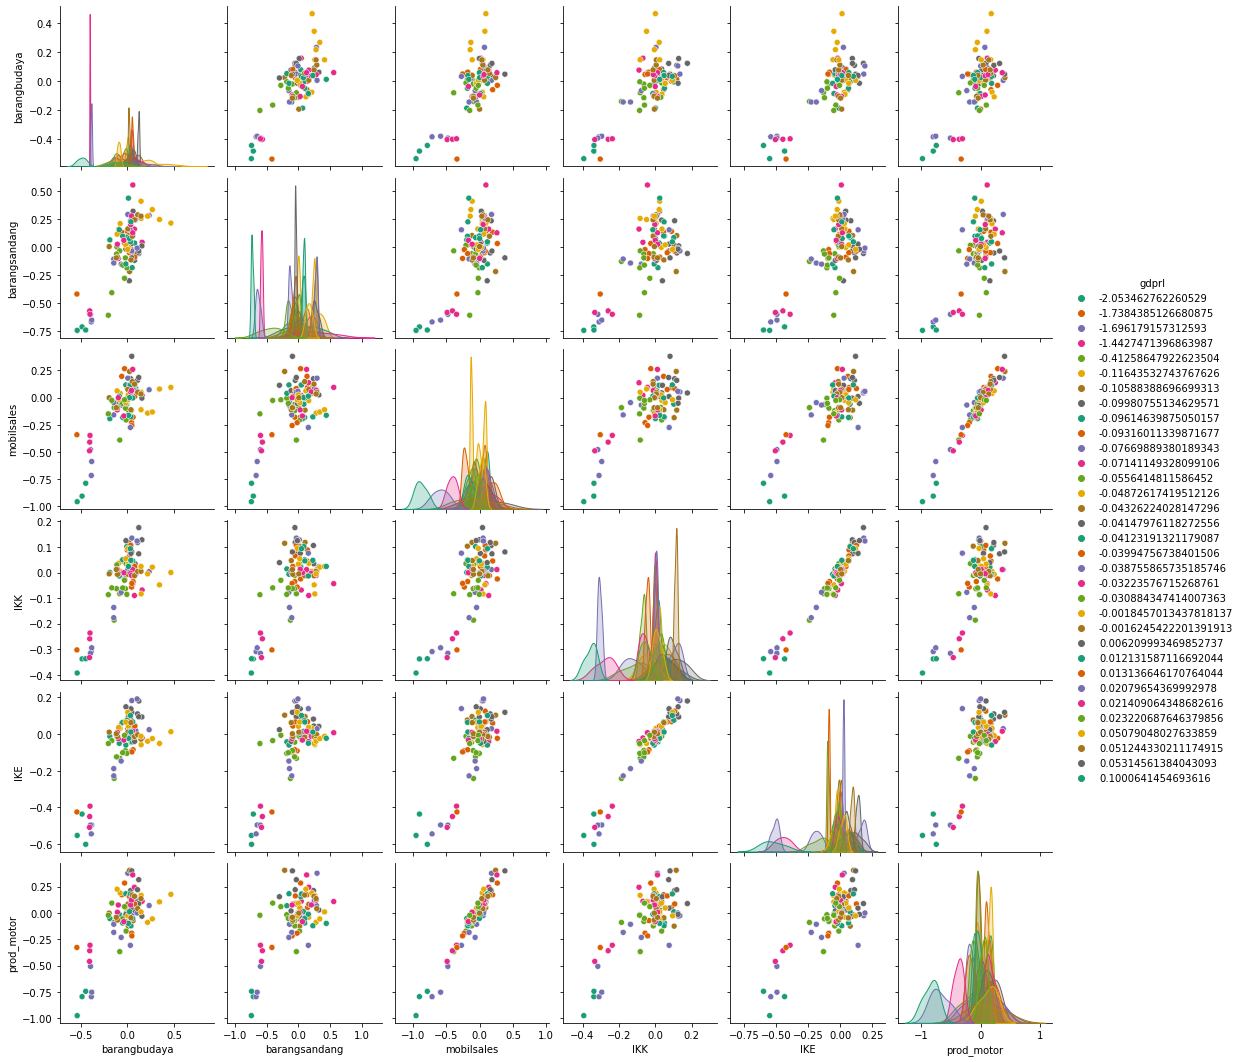

In [20]:
sns.pairplot(data, hue='gdprl', palette='Dark2')

In [21]:
X_train = data[:'Jun-20'].drop(['gdprl'], axis = 1)
y_train = data.loc[:'Jun-20', 'gdprl']
X_test = data['Jul-20':'Jan-21'].drop(['gdprl'], axis = 1)
y_test = data.loc['Jul-20':'Jan-21', 'gdprl']

In [22]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [34]:
pred = svr.predict(X_test)
pred

array([-1.79263451, -1.42775724, -0.91539924, -0.87202473, -0.65593528,
       -0.57953464, -0.55379759])

In [33]:
from sklearn.metrics import r2_score
accuracy_score = svr.score(X_test, pred)
print(f'Accuracy:{accuracy_score*100:.2f}')

Accuracy:100.00


In [31]:
X_test.shape, pred.shape

((7, 6), (7,))

Text(0.5, 1.0, 'Support Vector Machine (SVM)')

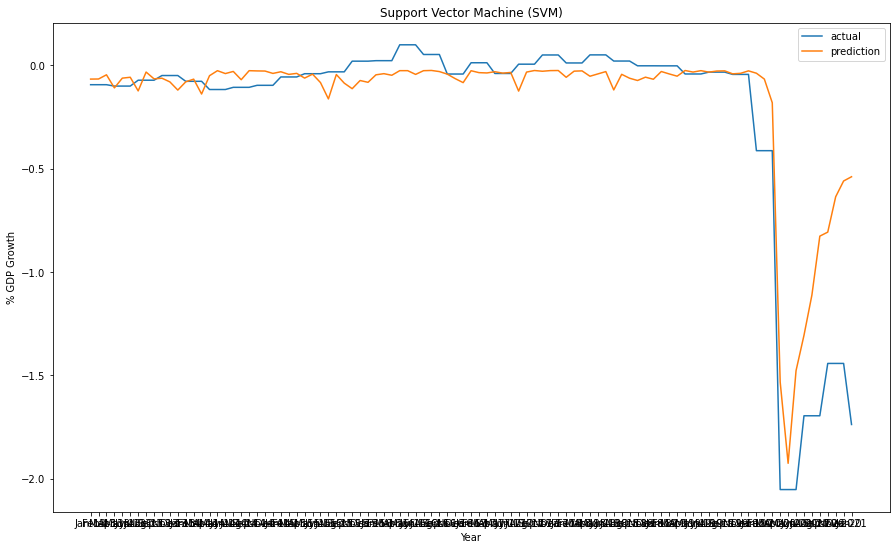

In [38]:
svm = SVR(kernel='poly', degree=2.496501, gamma='scale', C=0.002892853, epsilon=0.125218241739397)
svm_train = svm.fit(X_train, y_train)

ypred_svm = np.concatenate((svm_train.predict(X_train),
                            svm_train.predict(X_test)))
yact_svm = np.concatenate((y_train.values, y_test.values))
df_svm = pd.DataFrame(
    {'period': data.index, 'actual': yact_svm, 'prediction': ypred_svm})
df_svm.index = df_svm['period']
fig, ax = plt.subplots(figsize = (15,9))
ax.plot(df_svm['actual'],label='actual')
ax.plot(df_svm['prediction'],label='prediction')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('% GDP Growth')
ax.set_title('Support Vector Machine (SVM)')
#plt.scatter(X_train, y_train, color='r')
#plt.plot(X_train, pred, color='b')
#plt.title('SVR Result')
#plt.show()

In [41]:
import dalex as dx
exp = dx.Explainer(svr, x, y)
mp = exp.model_parts(loss_function = 'rmse')
mp.plot()

Preparation of a new explainer is initiated

  -> data              : 97 rows 6 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 97 values
  -> model_class       : sklearn.svm._classes.SVR (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x000002B466015EE0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = -1.95, mean = -0.17, max = 0.0744
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.18, mean = -0.0421, max = 0.101
  -> model_info        : package sklearn

A new explainer has been created!


In [42]:
price = pd.DataFrame({'barangbudaya'   : [-2.385710],
                      'barangsandang'   : [-2.625634],
                          'mobilsales'             : [-3.115346],
                          'IKK'               : [-2.665693],
                          'IKE'            : [-3.240705],
                          'prod_motor'     : [-2.856979]},
                          index = ['gdprl'])
shap = exp.predict_parts(new_observation = price, 
                              type = "shap")
shap.plot()

In [45]:
pparts = exp.predict_parts(new_observation = price, 
                              type = "break_down")
pparts.plot()

In [46]:
# Ceteris Paribus profile for apartment observation
cp = exp.predict_profile(new_observation = price)

# plot Ceteris Paribus profile
cp.plot(variables = ['barangsandang', 'IKK', 'mobilsales', 'prod_motor', 'barangbudaya', 'IKE'])

Calculating ceteris paribus: 100%|██████████████████████████████████████████████████████| 6/6 [00:00<00:00, 141.29it/s]


gdprl           -0.001625
barangbudaya     0.144244
barangsandang    0.278689
mobilsales       0.032608
IKK              0.005215
IKE             -0.027426
prod_motor       0.136215
Name: Dec-18, dtype: float64

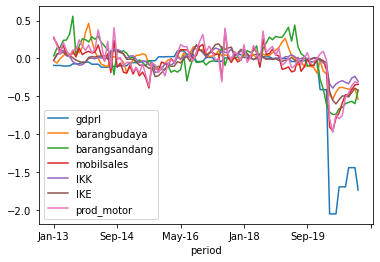

In [51]:
data.plot()
data.loc['Dec-18']

In [52]:
gdp = pd.DataFrame({'barangbudaya'   : [-0.001625],
                      'barangsandang'   : [0.278689],
                          'mobilsales'             : [0.032608],
                          'IKK'               : [0.005215],
                          'IKE'            : [-0.027426],
                          'prod_motor'     : [0.136215]},
                          index = ['gdprl'])
shap = exp.predict_parts(new_observation = gdp, 
                              type = "shap")
shap.plot()

In [53]:
bd = exp.predict_parts(new_observation = gdp, 
                              type = "break_down")
bd.plot()

In [55]:
# Ceteris Paribus profile for apartment observation
cp = exp.predict_profile(new_observation = gdp)

# plot Ceteris Paribus profile
cp.plot(variables = ['barangsandang', 'IKK', 'mobilsales', 'prod_motor', 'barangbudaya', 'IKE'])

Calculating ceteris paribus: 100%|██████████████████████████████████████████████████████| 6/6 [00:00<00:00, 139.55it/s]


In [58]:
# model running
rf = RandomForestRegressor(min_samples_leaf = 1, n_estimators = 1645, min_samples_split = 2)
rf = rf.fit(X_train, y_train)
pred = rf.predict(X_test)

Text(0.5, 1.0, 'Support Vector Machine (SVM)')

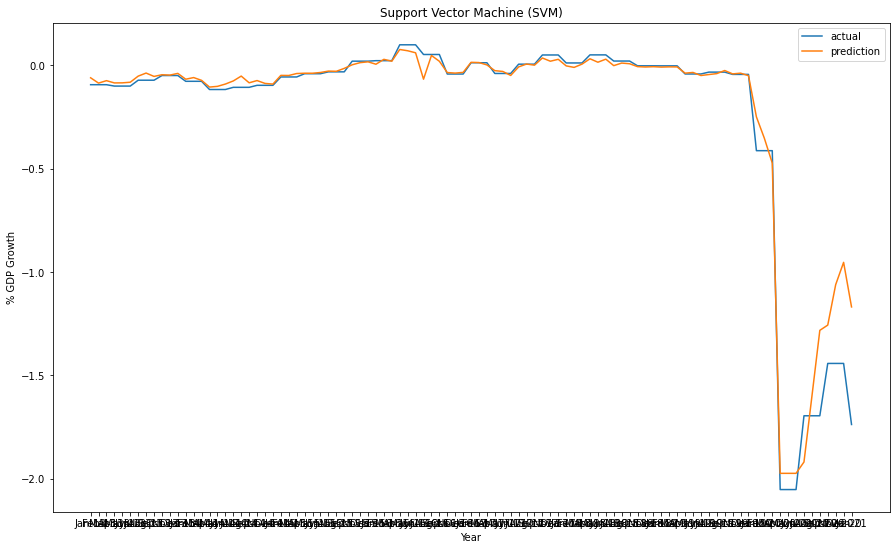

In [65]:
#svm = SVR(kernel='poly', degree=2.496501, gamma='scale', C=0.002892853, epsilon=0.125218241739397)
#svm_train = svm.fit(X_train, y_train)

ypred_rf = np.concatenate((rf.predict(X_train),
                            rf.predict(X_test)))
yact_rf = np.concatenate((y_train.values, y_test.values))
df_rf = pd.DataFrame(
    {'period': data.index, 'actual': yact_rf, 'prediction': ypred_rf})
df_rf.index = df_rf['period']
fig, ax = plt.subplots(figsize = (15,9))
ax.plot(df_rf['actual'],label='actual')
ax.plot(df_rf['prediction'],label='prediction')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('% GDP Growth')
ax.set_title('Support Vector Machine (SVM)')
#plt.scatter(X_train, y_train, color='r')
#plt.plot(X_train, pred, color='b')
#plt.title('SVR Result')
#plt.show()

In [60]:
from sklearn.metrics import r2_score
accuracy_score = rf.score(X_test, pred)
print(f'Accuracy:{accuracy_score*100:.2f}')

Accuracy:100.00


In [61]:
exp = dx.Explainer(rf, x, y)
mp = exp.model_parts(loss_function = 'rmse')
mp.plot()

Preparation of a new explainer is initiated

  -> data              : 97 rows 6 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 97 values
  -> model_class       : sklearn.ensemble._forest.RandomForestRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x000002B466015EE0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = -1.97, mean = -0.189, max = 0.0774
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.569, mean = -0.0233, max = 0.224
  -> model_info        : package sklearn

A new explainer has been created!


In [62]:
gdp = pd.DataFrame({'barangbudaya'   : [-2.385710],
                      'barangsandang'   : [-2.625634],
                          'mobilsales'             : [-3.115346],
                          'IKK'               : [-2.665693],
                          'IKE'            : [-3.240705],
                          'prod_motor'     : [-2.856979]},
                          index = ['gdprl'])
shap = exp.predict_parts(new_observation = gdp, 
                              type = "shap")
shap.plot()

In [63]:
gdp = pd.DataFrame({'barangbudaya'   : [-0.001625],
                      'barangsandang'   : [0.278689],
                          'mobilsales'             : [0.032608],
                          'IKK'               : [0.005215],
                          'IKE'            : [-0.027426],
                          'prod_motor'     : [0.136215]},
                          index = ['gdprl'])
shap = exp.predict_parts(new_observation = gdp, 
                              type = "shap")
shap.plot()

In [64]:
bd = exp.predict_parts(new_observation = gdp, 
                              type = "break_down")
bd.plot()

In [67]:
rf_exp = dx.Explainer(rf, x, y)
pdp_rf = rf_exp.model_profile()
svm_exp = dx.Explainer(svm, x, y)
pdp_svm = svm_exp.model_profile()

Preparation of a new explainer is initiated

  -> data              : 97 rows 6 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 97 values
  -> model_class       : sklearn.ensemble._forest.RandomForestRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x000002B466015EE0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.


Calculating ceteris paribus:   0%|                                                               | 0/6 [00:00<?, ?it/s]

  -> predicted values  : min = -1.97, mean = -0.189, max = 0.0774
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.569, mean = -0.0233, max = 0.224
  -> model_info        : package sklearn

A new explainer has been created!


Calculating ceteris paribus: 100%|███████████████████████████████████████████████████████| 6/6 [00:00<00:00, 74.07it/s]

Preparation of a new explainer is initiated

  -> data              : 97 rows 6 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 97 values
  -> model_class       : sklearn.svm._classes.SVR (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x000002B466015EE0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = -1.93, mean = -0.158, max = -0.0242
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.2, mean = -0.0541, max = 0.143
  -> model_info        : package sklearn

A new explainer has been created!


In [75]:
pdp_rf.plot(pdp_svm)

In [77]:
mp_rf = rf_exp.model_performance(model_type = "regression", 
          cutoff = 0.5)
mp_rf.result

mse      rmse        r2       mae       mad
RandomForestRegressor  0.010961  0.104693  0.960594  0.042023  0.013068

In [79]:
mp_svm = svm_exp.model_performance(model_type = "regression", 
          cutoff = 0.5)
mp_svm.result

mse      rmse        r2       mae       mad
SVR  0.059769  0.244476  0.785122  0.122444  0.057652

In [83]:
elnet = ElasticNet(alpha=0.001296872, l1_ratio=0.6032794)
elnet = elnet.fit(X_train, y_train)
pred = elnet.predict(X_test)

In [87]:
accuracy_score = elnet.score(X_test, pred)
accuracy_score
print(f'Accuracy:{accuracy_score*100:.2f}')

Accuracy:100.00


In [90]:
elnet_exp = dx.Explainer(elnet, x, y)
mp_elnet = elnet_exp.model_performance(model_type = "regression", 
          cutoff = 0.5)
mp_elnet.result

Preparation of a new explainer is initiated

  -> data              : 97 rows 6 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 97 values
  -> model_class       : sklearn.linear_model._coordinate_descent.ElasticNet (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x000002B466015EE0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = -1.57, mean = -0.174, max = 0.262
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.803, mean = -0.0383, max = 0.459
  -> model_info        : package sklearn

A new explainer has been created!


mse      rmse        r2       mae       mad
ElasticNet  0.059314  0.243545  0.786755  0.183224  0.160168

Text(0.5, 1.0, 'Elnet')

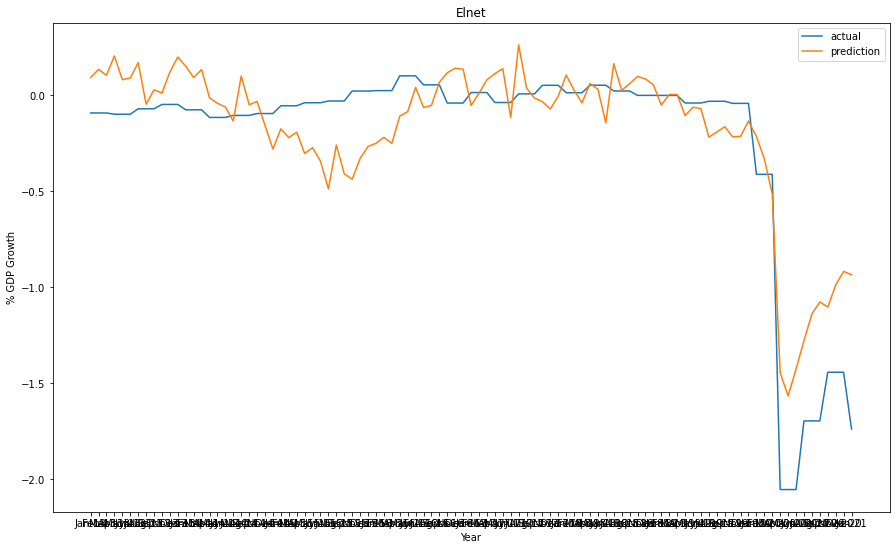

In [92]:
ypred_rf = np.concatenate((elnet.predict(X_train),
                            elnet.predict(X_test)))
yact_rf = np.concatenate((y_train.values, y_test.values))
df_elnet = pd.DataFrame(
    {'period': data.index, 'actual': yact_rf, 'prediction': ypred_rf})
df_elnet.index = df_elnet['period']
fig, ax = plt.subplots(figsize = (15,9))
ax.plot(df_elnet['actual'],label='actual')
ax.plot(df_elnet['prediction'],label='prediction')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('% GDP Growth')
ax.set_title('Elnet')

In [93]:
mp = elnet_exp.model_parts(loss_function = 'rmse')
mp.plot()

In [94]:
gdp = pd.DataFrame({'barangbudaya'   : [-0.001625],
                      'barangsandang'   : [0.278689],
                          'mobilsales'             : [0.032608],
                          'IKK'               : [0.005215],
                          'IKE'            : [-0.027426],
                          'prod_motor'     : [0.136215]},
                          index = ['gdprl'])
shap = elnet_exp.predict_parts(new_observation = gdp, 
                              type = "shap")
shap.plot()

In [95]:
bd = elnet_exp.predict_parts(new_observation = gdp, 
                              type = "break_down")
bd.plot()

In [96]:
# Ceteris Paribus profile for apartment observation
cp = elnet_exp.predict_profile(new_observation = gdp)

# plot Ceteris Paribus profile
cp.plot(variables = ['barangsandang', 'IKK', 'mobilsales', 'prod_motor', 'barangbudaya', 'IKE'])

Calculating ceteris paribus: 100%|██████████████████████████████████████████████████████| 6/6 [00:00<00:00, 142.85it/s]


In [ ]:
xg = XGBClassifier(learning_rate=0.02043134, n_estimators=164, max_depth=6)
xg_train = xg.fit(x_train_model, y_train)

In [98]:
xgb = XGBClassifier(learning_rate=0.02043134, n_estimators=164, max_depth=6)
xgb = xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)


[22:21:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [101]:
xgb_exp = dx.Explainer(xgb, x, y)
mp_xgb = xgb_exp.model_performance(model_type= "regression",
                                  cutoff=0.5)
mp_xgb.result

Preparation of a new explainer is initiated

  -> data              : 97 rows 6 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 97 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002B466019040> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.00432, mean = 0.0384, max = 0.554
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -2.16, mean = -0.251, max = 0.0832
  -> model_info        : package xgboost

A new explainer has been created!


mse     rmse        r2       mae       mad
XGBClassifier  0.381664  0.61779 -0.372145  0.263415  0.052037

In [102]:
mp_xgb = elnet_exp.model_parts(loss_function = 'rmse')
mp_xgb.plot()

In [103]:
gdp = pd.DataFrame({'barangbudaya'   : [-0.001625],
                      'barangsandang'   : [0.278689],
                          'mobilsales'             : [0.032608],
                          'IKK'               : [0.005215],
                          'IKE'            : [-0.027426],
                          'prod_motor'     : [0.136215]},
                          index = ['gdprl'])
shap = xgb_exp.predict_parts(new_observation = gdp, 
                              type = "shap")
shap.plot()

In [104]:
bd = xgb_exp.predict_parts(new_observation = gdp,
                          type = 'break_down')
bd.plot()

In [105]:
# Ceteris Paribus profile for apartment observation
xgb_cp = xgb_exp.predict_profile(new_observation = gdp)

# plot Ceteris Paribus profile
xgb_cp.plot(variables = ['barangsandang', 'IKK', 'mobilsales', 'prod_motor', 'barangbudaya', 'IKE'])

Calculating ceteris paribus: 100%|███████████████████████████████████████████████████████| 6/6 [00:00<00:00, 84.50it/s]
